# Bisection search
**Learning goals:**
- Conditional statements
- Pseudocode

**Starting Out with Python:**
- Ch. 3.4

### Bisection search theory


Bisection search is a basic algorithm for finding zeroes of [continuous functions](https://en.wikipedia.org/wiki/Continuous_function). Given a function f we first look for an interval $[a,b]$ such that either $f(a) < 0 \textrm{ and } f(b) > 0,$ or $f(a) > 0 \textrm{ and } f(b) < 0.$

Then, since $f$ is continuous, there must be a solution point $x$ in $[a,b]$ such that $f(x)=0.$
To make the interval tighter around $x$, we check the value at the midpoint $c = \frac{a + b}{2}.$

For simplicity, let us assume that $f(a)<0,$ and $f(b)>0.$ If the opposite is true, we can just switch the roles of $a$ and $b$ in the following.

If $f(c)<0$ then we can exchange $a$ for $c$ and start over with the smaller interval $[c,b]$. Likewise, if $f(c)>0$ then we can exchange $b$ for $c$ and start over with $[a,c]$.

In both cases, we end up with an interval of length $\frac{b-a}{2},$ half of the original search interval. Crucially, $f$ has values of opposite signs at the endpoints of this interval, so the interval still contains an $x$ such that $f(x)=0.$  



We can summarize the algorithm in the following pseudocode:

- 1:   Pick a starting interval $[a, b]$
- 2:   If $f(a)$ and $f(b)$ have the same sign, stop the program and report an error with the starting interval.
- 3:   Compute the midpoint $c = \frac{a+b}{2} \, \mathrm{and} \, f(c).$
- 4:   Replace either $a$ or $b$ with $c$ according to the rules above.
- 5:   If the interval is small enough, stop. Otherwise, start over from step 3 with the smaller interval.
 
In this exercise, you will use `if-elif-else` statements to answer input from the user. Consider the use of bisection search to find a zero of the function  $f(x)=(x−1)(x−3)$ with starting interval $[-1,2]$.



### Task a) 

Make a program that asks the user which number the method converges to. If the user answers 1, *print* `Great! Correct answer `. Otherwise, *print* `Wrong.`

Example run:
```
Which number does the method converge to? 1
Great! Correct answer.
  
Which number does the method converge to? 3
Wrong.
```
**Write code in the block below**

In [14]:
def f(x):
    return (x-1)*(x-3)
interval = [-1, 2]
correct_ans = 1
print("For function f(x)=(x-1)(x-3), with the starting interval [-1, 2]")
ans = input("Which number does the method converge to? ")
try:
    ans_int = int(ans)
    if ans_int == correct_ans:
        print("Great! Correct answer!")
    else:
        print("Wrong.")
except:
    print(f"\"{ans}\" is not a number!!")

For function f(x)=(x-1)(x-3), with the starting interval [-1, 2]
Which number does the method converge to? g
"g" is not a number!!
Hei jeg heter "Håkon"


### Task b)

The two zeroes of $f$ are clearly 1 and 3. Make a program that asks the user for a lower and upper limit for the starting interval and checks if the interval contains none, one or both of the zeroes.

Example run:
```
Lower limit of interval: -1000
Upper limit of interval: 0.5
There is no zero between -1000 and 0.5.
  
Lower limit of interval: 2
Upper limit of interval: 4
There is one zero between 2 and 4.
  
Lower limit of interval: 0
Upper limit of interval: 3.5
There are two zeroes between 0 and 3.5.
```
**Write code in the block below**

In [29]:
zeroes = [1, 3]
zeroes_in_interval = 0

try:
    lower_limit_float = float(input("Lower limit of interval: "))
    upper_limit_float = float(input("Upper limit of interval: "))
    
    if lower_limit_float < zeroes[0]:
        zeroes_in_interval += 1
    if upper_limit_float > zeroes[1]:
        zeroes_in_interval += 1
    if upper_limit_float < zeroes[0] or lower_limit_float > zeroes[1]:
        zeroes_in_interval = 0
      
    if not zeroes_in_interval:
        print(f"There is no zero between {lower_limit_float} and {upper_limit_float}.")
    elif zeroes_in_interval == 1:
        print(f"There is one zero between {lower_limit_float} and {upper_limit_float}.")
    elif zeroes_in_interval == 2:
        print(f"There are two zeroes between {lower_limit_float} and {upper_limit_float}.")
        
except ValueError:
    print("Input needs to be a number")



Lower limit of interval: 0
Upper limit of interval: 2
There is one zero between 0.0 and 2.0.


### Task c)

We will now work toward making an implementation of bisection search.
Make a program that asks the user for a lower and upper limit for the starting interval. Make a variable $\mathtt{f1} = (x_{\mathrm{low}}-1)(x_{\mathrm{low}}-3)$ and a variable $\mathtt{f2} = (x_{\mathrm{high}}-1)(x_{\mathrm{high}}-3)$  where $x_{low}$ is the lower limit and $x_{high}$ the upper limit.

If `f1*f2 < 0`, the interval is a valid starting interval. If this is the case, do **one** iteration of bisection search (i.e. points 3 and 4 of the pseudoalgorithm) and print the new interval. Otherwise, print `Invalid starting interval`. 

Run example:
```
Lower limit of interval: 2
Upper limit of interval: 5
There is a zero between 2 and 3.5.
  
Lower limit of interval: 0
Upper limit of interval: 5
Invalid starting interval.
```

**Write code in the block below**

In [48]:
x_1 = float(input("Lower limit of interval: "))
x_2 = float(input("Upper limit of interval: "))

def f(x): return (x-1)*(x-3)

if f(x_1)*f(x_2) < 0:
    c = (x_1+x_2)/2
    f3 = f(c)
    if f(c) == 0:
        print(f"f({c}) is at zero")
    elif f(x_1)*f(c) < 0:
        x_list = [c, x_1]
        x_list.sort()
        print(f"There is a zero between {x_list[0]} and {x_list[1]}.")
    else:
        x_list = [c, x_2]
        x_list.sort()
        print(f"There is a zero between {x_list[0]} and {x_list[1]}.")
else:
    print("Invalid starting interval")


Lower limit of interval: 0
Upper limit of interval: 2
f(1.0) is at zero


#### Hint

To do you one iteration of bisection search, you should first compute the point `c = (x_low+x_high)/2` , then compute `f3 = (c-1)*(c-3)`.

Then, you can either use a double `if` statement, splitting into two cases (`f3 < 0` and `f3 > 0`) and for each of these working out what values to swap (e.g. if f3 < 0 and f1 < 0, swap xlow and c), OR you can check four cases (i.e. check the cases: `if f3 < 0 and f1 < 0` ; `if f3 < 0 and f2 < 0`, `if f3 > 0 and f1 > 0`, and `if f3 > 0 and f2 > 0`). If you are clever, you can reduce this to just checking two conditions!

### Task d)

So far, we have only considered the function $f(x)=(x−1)(x−3)$ but we can, of course, apply the algorithm to other functions. Check if the program works by testing on the function  $g(x)=x^2−2$. The only variables you need to change are `f1`, `f2` and `f3=f(c)`. 


Example run:
```
Lower limit of interval: 0
Upper limit of interval: 4
There is a zero between 0 and 2.0.
 
Lower limit of interval: 0
Upper limit of interval: 2
There is a zero between 1.0 and 2.0.
 
Lower limit of interval: 1
Upper limit of interval: 2
There is a zero between 1.0 and 1.5.
 
Lower limit of interval: 1
Upper limit of interval: 1.5
There is a zero between 1.25 and 1.5.
.
.
.
Lower limit of interval: 1.4140625
Upper limit of interval: 1.421875
There is a zero between 1.4140625 and 1.41796875.
```
Observe that the zero of g in this interval is   x=2√≈1.4142, which lies between 1.414 and 1.418. 

**Write code in the block below**

Lower limit of interval: 1
Upper limit of interval: 2
There is a zero between 1.0 and 1.5.


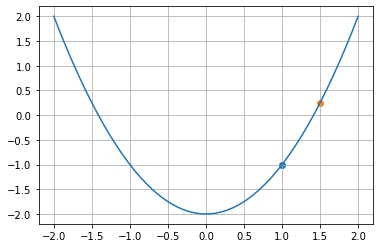

In [57]:
import numpy as np
from matplotlib import pyplot as plt

x_1 = float(input("Lower limit of interval: "))
x_2 = float(input("Upper limit of interval: "))

def f(x): return x**2 - 2

if f(x_1)*f(x_2) < 0:
    c = (x_1+x_2)/2
    f3 = f(c)
    if f(c) == 0:
        print(f"f({c}) is at zero")
    elif f(x_1)*f(c) < 0:
        x_list = [c, x_1]
        x_list.sort()
        plt.scatter(x_1, f(x_1))
        plt.scatter(c, f(c))
        print(f"There is a zero between {x_list[0]} and {x_list[1]}.")
    else:
        x_list = [c, x_2]
        x_list.sort()
        plt.scatter(x_2, f(x_2))
        plt.scatter(c, f(c))
        print(f"There is a zero between {x_list[0]} and {x_list[1]}.")
        
    x = np.linspace(-2, 2)
    plt.plot(x, f(x))
    plt.grid()
    plt.show()
else:
    print("Invalid starting interval")

